In [2]:
import IPython.display as ipd
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

#The package name is called "thinkx"
import thinkdsp
import thinkplot

from scipy.stats import kurtosis, skew

import statistics

% pylab inline
import os
import pandas as pd
import librosa
from librosa import display 

import scipy
from scipy.signal import hann
from scipy.fftpack import rfft

from __future__ import print_function, division

Populating the interactive namespace from numpy and matplotlib


/Users/kevenlemoing/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display', 'rfft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
        ipd.Audio('/Users/kevenlemoing/Sites/sandvik_code_assignement/data/downloads/1snoke-20120412-hge/wav/a0406.wav')

## Audio data exploring

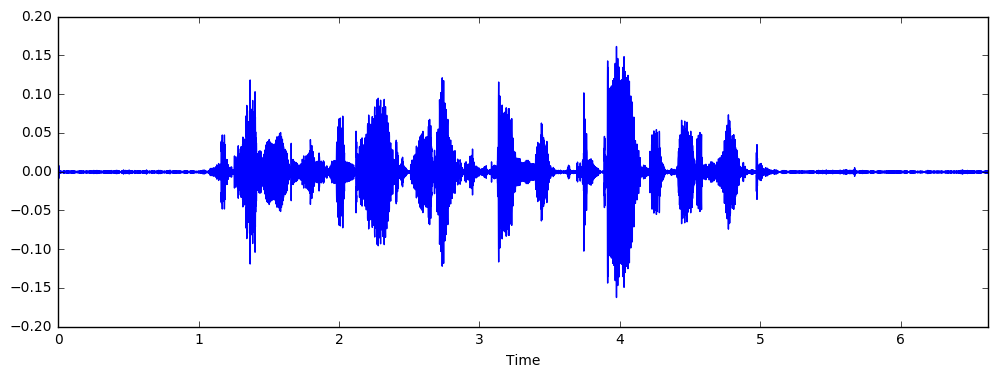

In [15]:
#First vizualization
data, sampling_rate = librosa.load('/Users/kevenlemoing/Sites/sandvik_code_assignement/data/downloads/1snoke-20120412-hge/wav/a0405.wav')

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

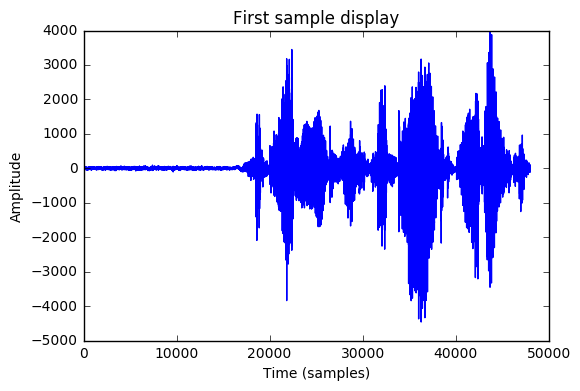

In [3]:
# read audio samples
wave = read("/Users/kevenlemoing/Sites/sandvik_code_assignement/data/downloads/1snoke-20120412-hge/wav/a0405.wav")
audio = wave[1]

# plot only the first 48000 samples
plt.plot(audio[0:48000])

# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time (samples)")

# set the title
plt.title("First sample display")

# display the plot
plt.show()

## Extracting main features

* Mean frequency (in kHz) 
* Standard deviation of frequency
* Median frequency (in kHz) 
* First quantile (in kHz) 
* Third quantile (in kHz) 
* Inter-quantile range (in kHz) 
* Skewness 
* Kurtosis 
* Mode frequency 
* Peak frequency

In [3]:
wave = thinkdsp.read_wave('/Users/kevenlemoing/Sites/sandvik_code_assignement/data/downloads/abc-20091120-mfr/wav/a0066.wav')

In [4]:
spectrum = wave.make_spectrum()

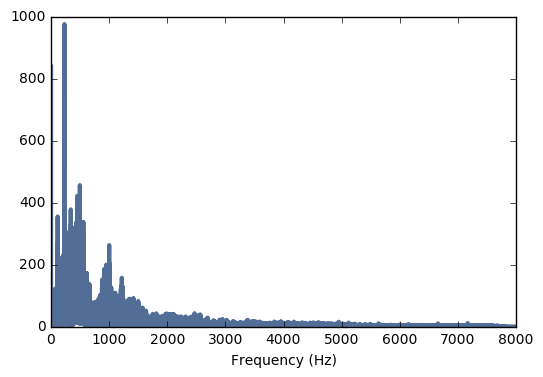

In [28]:
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)')

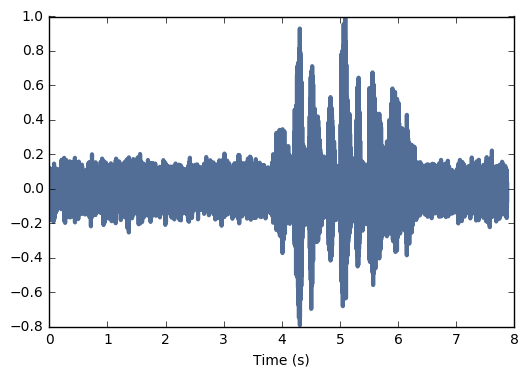

In [29]:
#start = 1.5
#duration = 10
#segment = wave.segment(start, duration)
wave.plot()
thinkplot.config(xlabel='Time (s)')

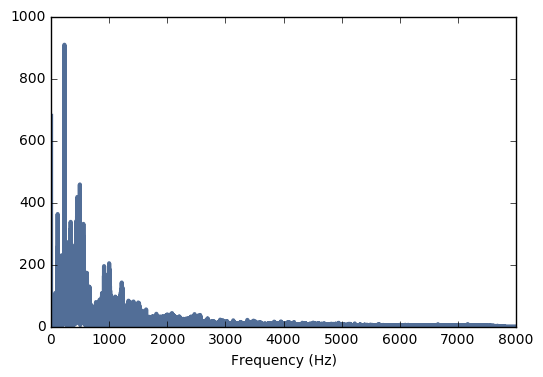

In [5]:
#Let's display the spectrum of our record
spectrum = segment.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)')

In [6]:
#The function "peaks" prints the highest points in the spectrum and their frequencies, in descending order:
spectrum.peaks()[:10]

[(975.63548784057798, 230.09523809523807),
 (838.69055020205155, 0.0),
 (726.75899848320296, 229.96825396825395),
 (455.95938129846434, 495.49206349206344),
 (443.10778721007563, 230.34920634920633),
 (421.38524701604769, 451.8095238095238),
 (411.92280070713866, 495.61904761904759),
 (407.45458636248895, 494.09523809523807),
 (407.00999193572528, 494.22222222222217),
 (405.07766812527842, 229.71428571428569)]

In [5]:
len(spectrum.peaks())

63001

In [34]:
#Getting frequencies of the signal

#freq = []

#for i in range (len(spectrum.peaks())):
#    freq.append(spectrum.peaks()[i][1])

#freq[:10]

In [31]:
#Mean frequency
#mean(freq)
mean = mean(spectrum.peaks()[1])
mean

419.34527510102578

In [35]:
#Standard deviation of frequency
#std(freq)
#std = std(spectrum.peaks()[1])
std = statistics.stdev(spectrum.peaks()[1])
std 

593.0437753649472

In [37]:
#Test with numpy 
arr = numpy.array(spectrum.peaks()[1])
std2 = numpy.std(arr, axis=0)
mean2 = numpy.mean(arr, axis=0)

In [39]:
print (std2)
print (mean2)

419.345275101
419.345275101


In [15]:
#Median frequency
#median(freq)
median(spectrum.peaks()[1])

419.34527510102578

In [42]:
#median frequency with package statistics
median2 = statistics.median(spectrum.peaks()[1])
median2

419.34527510102578

In [43]:
#
mean3 = statistics.mean(spectrum.peaks()[1])
mean3

419.34527510102578

In [7]:
#First quantile
d = {'frequency':spectrum.peaks()[1]}

freq_df = pd.DataFrame(d)
freq_df.quantile(0.1)[0]

83.869055020205167

In [8]:
#Third quantile
freq_df.quantile(0.3)[0]

251.60716506061544

In [9]:
#Inter quantile range
q75, q25 = np.percentile(spectrum.peaks()[1], [75 ,25])
iqr = q75 - q25
iqr

419.34527510102572

In [19]:
#Kurtosis
kurtosis(spectrum.peaks()[1])

-0.7311407959757004

In [20]:
#Skewness (skewness of normal distribution should be 0)
skew(spectrum.peaks()[1])

0.5877048047407836

In [46]:
#Mode frequency
a = statistics.mode(spectrum.peaks()[1])

StatisticsError: no unique mode; found 2 equally common values

## Additional features

** Time domain feature **

* RMSE
* WaveForm

** Frequency domain feature **

* Amplitude of individuals frequency

** Perceptual features **

* MFCC

** Windowing features **

* Hamming distances of winfows

In [ ]:
#RMSE

In [38]:
#WaveForm

In [39]:
#Amplitude of individuals frequency

In [40]:
#MFCC
#X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
#mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 

In [41]:
#Hamming distances of windows